Структура проекта:
1) Загрузка данных.
2) Объединение таблиц.
3) Изменение данных для возможности группировки по разным годам и датам.
4) Создание графиков для сравнения средних и абсолютных перетоков энергии по странам:
<br> Бельгия (BE) -> Франция (FR)
<br> Бельгия (BE) -> Нидерланды (NL)
5) Выводы.   

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# загрузка данных
# путь для загрузки с сервера
path_server = 'https://raw.githubusercontent.com/aegorovspb/energy/main/data_energy/'
# ПК
path_locall = 'C://Users/Andrew/GitHub/energy/data_energy/'

# функция для обработки ошибки при загрузке с сервера
# альтернативная загрузка с ПК

def loading_data(file_name):    
    try:
        df = pd.read_csv(path_server+file_name) # , sep='\t'
        print(file_name, 'has been downloaded from the server')
    except IOError:
        print('HTTP Error 404: File Not Found')
        try:
            df = pd.read_csv(path_locall+file_name)
            print(file_name, 'has been downloaded from the local host')
        except IOError:
            print('Local Error: File Not Found')
    return df

In [3]:
# загрузка файлов Бельгия - Франция 2021 и 2022 год
be_fr_2021 = loading_data('CBP_Flow_BE_FR_2021.csv')
be_fr_2022 = loading_data('CBP_Flow_BE_FR_2022.csv')

CBP_Flow_BE_FR_2021.csv has been downloaded from the server
CBP_Flow_BE_FR_2022.csv has been downloaded from the server


In [4]:
# загрузка файлов Бельгия - Нидерланды 2021 и 2022 год
be_nl_2021 = loading_data('CBP_Flow_BE_NL_2021.csv')
be_nl_2022 = loading_data('CBP_Flow_BE_NL_2022.csv')

CBP_Flow_BE_NL_2021.csv has been downloaded from the server
CBP_Flow_BE_NL_2022.csv has been downloaded from the server


In [5]:
# создаем список с именами полученных таблиц
tables_list = [be_fr_2021, be_fr_2022, be_nl_2021, be_nl_2022]

# функция обзора полученных данных
def data_view(tables_in):
    for index in tables_in:
        display(index.head(2))
        print(index.info())

In [6]:
# обращаемся к функции
data_view(tables_list)

,Time (CET/CEST),France (FR) > Belgium (BE) [MW],Belgium (BE) > France (FR) [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,0.0,477.0
1,01.01.2021 01:00 - 01.01.2021 02:00,0.0,645.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time (CET/CEST)                  8760 non-null   object 
 1   France (FR) > Belgium (BE) [MW]  8759 non-null   float64
 2   Belgium (BE) > France (FR) [MW]  8757 non-null   float64
dtypes: float64(2), object(1)
memory usage: 205.4+ KB
None


,Time (CET/CEST),France (FR) > Belgium (BE) [MW],Belgium (BE) > France (FR) [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,0.0,2618.0
1,01.01.2022 01:00 - 01.01.2022 02:00,0.0,2361.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time (CET/CEST)                  8760 non-null   object 
 1   France (FR) > Belgium (BE) [MW]  8759 non-null   float64
 2   Belgium (BE) > France (FR) [MW]  8759 non-null   float64
dtypes: float64(2), object(1)
memory usage: 205.4+ KB
None


,Time (CET/CEST),Netherlands (NL) > Belgium (BE) [MW],Belgium (BE) > Netherlands (NL) [MW]
0,01.01.2021 00:00 - 01.01.2021 01:00,1691.0,0.0
1,01.01.2021 01:00 - 01.01.2021 02:00,1418.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time (CET/CEST)                       8760 non-null   object 
 1   Netherlands (NL) > Belgium (BE) [MW]  8759 non-null   float64
 2   Belgium (BE) > Netherlands (NL) [MW]  8759 non-null   float64
dtypes: float64(2), object(1)
memory usage: 205.4+ KB
None


,Time (CET/CEST),Netherlands (NL) > Belgium (BE) [MW],Belgium (BE) > Netherlands (NL) [MW]
0,01.01.2022 00:00 - 01.01.2022 01:00,620.0,0.0
1,01.01.2022 01:00 - 01.01.2022 02:00,728.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time (CET/CEST)                       8760 non-null   object 
 1   Netherlands (NL) > Belgium (BE) [MW]  8759 non-null   float64
 2   Belgium (BE) > Netherlands (NL) [MW]  8759 non-null   float64
dtypes: float64(2), object(1)
memory usage: 205.4+ KB
None


In [7]:
# смена названий столбцов
# Time (CET/CEST)   France (FR) > Belgium (BE) [MW] Belgium (BE) > France (FR) [MW]

be_fr_2021 = be_fr_2021.rename(columns={
    'Time (CET/CEST)': 'time',
    'France (FR) > Belgium (BE) [MW]':'fr_be_2021',
    'Belgium (BE) > France (FR) [MW]':'be_fr_2021'
    })

be_fr_2022 = be_fr_2022.rename(columns={
    'Time (CET/CEST)': 'time',
    'France (FR) > Belgium (BE) [MW]':'fr_be_2022',
    'Belgium (BE) > France (FR) [MW]':'be_fr_2022'
    })

be_nl_2021 = be_nl_2021.rename(columns={
    'Time (CET/CEST)': 'time',
    'Netherlands (NL) > Belgium (BE) [MW]':'nl_be_2021',
    'Belgium (BE) > Netherlands (NL) [MW]':'be_nl_2021'
    })

be_nl_2022 = be_nl_2022.rename(columns={
    'Time (CET/CEST)': 'time',
    'Netherlands (NL) > Belgium (BE) [MW]':'nl_be_2022',
    'Belgium (BE) > Netherlands (NL) [MW]':'be_nl_2022'
    })

In [8]:
# для вывода на графике переносим данные в один DF 2021 - 2022
# задаем отрицательные значения для перетока Франция -> Бельгия, Нидерланды -> Бельгия

be_fr_2021[['fr_be_2022', 'be_fr_2022']] = be_fr_2022[['fr_be_2022', 'be_fr_2022']]
be_nl_2021[['nl_be_2022', 'be_nl_2022']] = be_nl_2022[['be_nl_2022', 'nl_be_2022']]

be_fr_2021[['fr_be_2021', 'fr_be_2022']] = abs(be_fr_2021[['fr_be_2021', 'fr_be_2022']])*-1
be_nl_2021[['nl_be_2021', 'nl_be_2022']] = abs(be_nl_2021[['nl_be_2021', 'nl_be_2022']])*-1

In [9]:
# проверка данных
display(be_fr_2021.head(2))
display(be_nl_2021.head(2))

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022
0,01.01.2021 00:00 - 01.01.2021 01:00,-0.0,477.0,-0.0,2618.0
1,01.01.2021 01:00 - 01.01.2021 02:00,-0.0,645.0,-0.0,2361.0


,time,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,01.01.2021 00:00 - 01.01.2021 01:00,-1691.0,0.0,-0.0,620.0
1,01.01.2021 01:00 - 01.01.2021 02:00,-1418.0,0.0,-0.0,728.0


In [10]:
# создадим словарь для замены значений времени, . один любой символ
# '01.01.2021 00:00 - 01.01.2021 01:00' -> '00:00'
time_list = {
    '......2021 00:00 - ......2021 01:00': '00:00',
    '......2021 01:00 - ......2021 02:00': '01:00',
    '......2021 02:00 - ......2021 03:00': '02:00',
    '......2021 03:00 - ......2021 04:00': '03:00',
    '......2021 04:00 - ......2021 05:00': '04:00',
    '......2021 05:00 - ......2021 06:00': '05:00',
    '......2021 06:00 - ......2021 07:00': '06:00',
    '......2021 07:00 - ......2021 08:00': '07:00',
    '......2021 08:00 - ......2021 09:00': '08:00',
    '......2021 09:00 - ......2021 10:00': '09:00',
    '......2021 10:00 - ......2021 11:00': '10:00',
    '......2021 11:00 - ......2021 12:00': '11:00',
    '......2021 12:00 - ......2021 13:00': '12:00',
    '......2021 13:00 - ......2021 14:00': '13:00',
    '......2021 14:00 - ......2021 15:00': '14:00',
    '......2021 15:00 - ......2021 16:00': '15:00',
    '......2021 16:00 - ......2021 17:00': '16:00',
    '......2021 17:00 - ......2021 18:00': '17:00',
    '......2021 18:00 - ......2021 19:00': '18:00',
    '......2021 19:00 - ......2021 20:00': '19:00',
    '......2021 20:00 - ......2021 21:00': '20:00',
    '......2021 21:00 - ......2021 22:00': '21:00',
    '......2021 22:00 - ......2021 23:00': '22:00',
    '......2021 23:00 - ......2021 00:00': '23:00'
}

In [11]:
# для каждого неправильного имени вызываем метод replace() используя словарь
def replace_wrong_time(df_name):
    for wrong_value in time_list:
        df_name['time'] = df_name['time'].replace(wrong_value, time_list.get(wrong_value), regex=True)

In [12]:
# обращаемся к функции
replace_wrong_time(be_fr_2021)
replace_wrong_time(be_nl_2021)

In [13]:
# сгруппируем данные, получим среднее значение за год по времени
be_fr_2021_grouped = (be_fr_2021.groupby(['time'])
                          .mean()
                          .round(1)
                          .reset_index()
                          .sort_values('time', ascending = True))

be_nl_2021_grouped = (be_nl_2021.groupby(['time'])
                          .mean()
                          .round(1)
                          .reset_index()
                          .sort_values('time', ascending = True))

In [14]:
# проверка данных
display(be_fr_2021_grouped.head(2))
display(be_nl_2021_grouped.head(2))

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022
0,00:00,-333.2,870.2,-40.0,1447.7
1,01:00,-403.7,852.7,-53.1,1427.0


,time,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,00:00,-732.3,286.1,-214.7,780.6
1,01:00,-656.5,393.4,-272.4,715.4


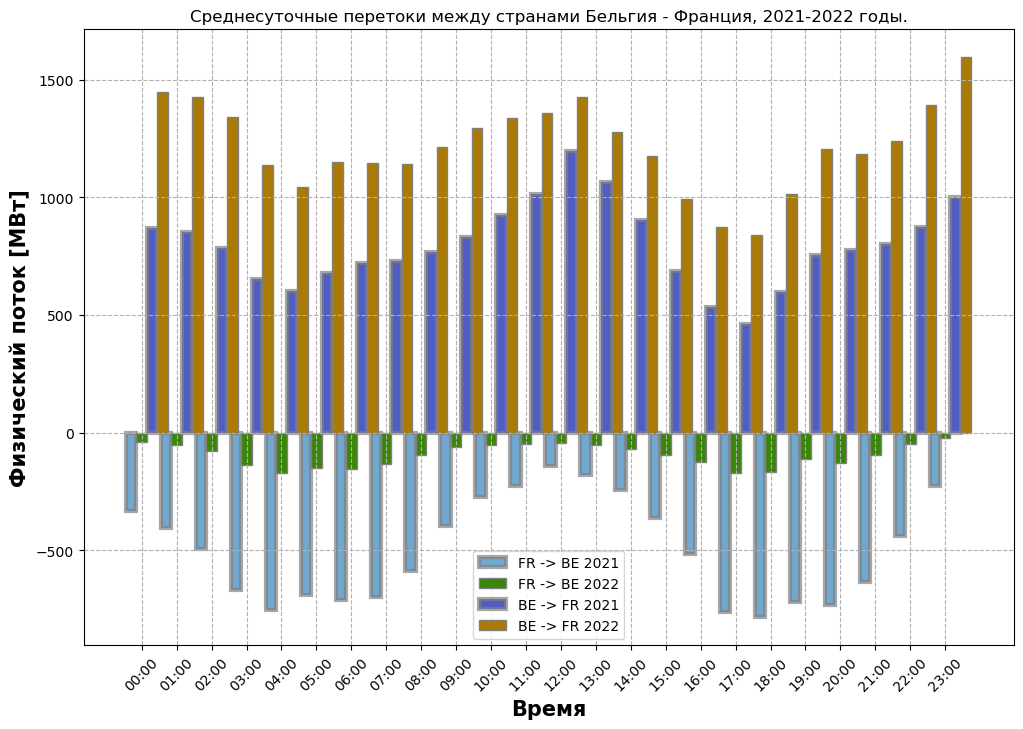

In [15]:
# import matplotlib.pyplot as plt 
 
# ширина столбца и размер графика 
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))

# формирование входных данные
fr_be_2021_plot = be_fr_2021_grouped['fr_be_2021'] 
fr_be_2022_plot = be_fr_2021_grouped['fr_be_2022'] 
be_fr_2021_plot = be_fr_2021_grouped['be_fr_2021']
be_fr_2022_plot = be_fr_2021_grouped['be_fr_2022']
 
# задание позиции столбцов графика по оси Х (задание смещения) 
br1 = np.arange(len(be_fr_2021_grouped['time'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# построение графика 
plt.bar(br1, fr_be_2021_plot, color ='#3584BB', width = barWidth, 
        linewidth=3, alpha=0.7, edgecolor ='grey', label ='FR -> BE 2021') 
plt.bar(br2, fr_be_2022_plot, color ='#3A8608', width = barWidth, 
        edgecolor ='grey', label ='FR -> BE 2022') 

plt.bar(br3, be_fr_2021_plot, color ='#0519AB', width = barWidth, 
        linewidth=3, alpha=0.7, edgecolor ='grey', label ='BE -> FR 2021')
plt.bar(br4, be_fr_2022_plot, color ='#AB7A05', width = barWidth, 
        edgecolor ='grey', label ='BE -> FR 2022')


# добавление подписей
plt.title('Среднесуточные перетоки между странами Бельгия - Франция, 2021-2022 годы.')
plt.xlabel('Время', fontweight ='bold', fontsize = 15) 
plt.ylabel('Физический поток [МВт]', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in np.arange(len(be_fr_2021_grouped['time']))], 
        ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'])

# поворот надписей
plt.xticks(rotation = 45)

# сохранение
plt.savefig('be_fr_2021_22_plot.png', bbox_inches='tight')

# сетка и ее стиль
plt.grid(linestyle='--')
plt.legend()
plt.show();

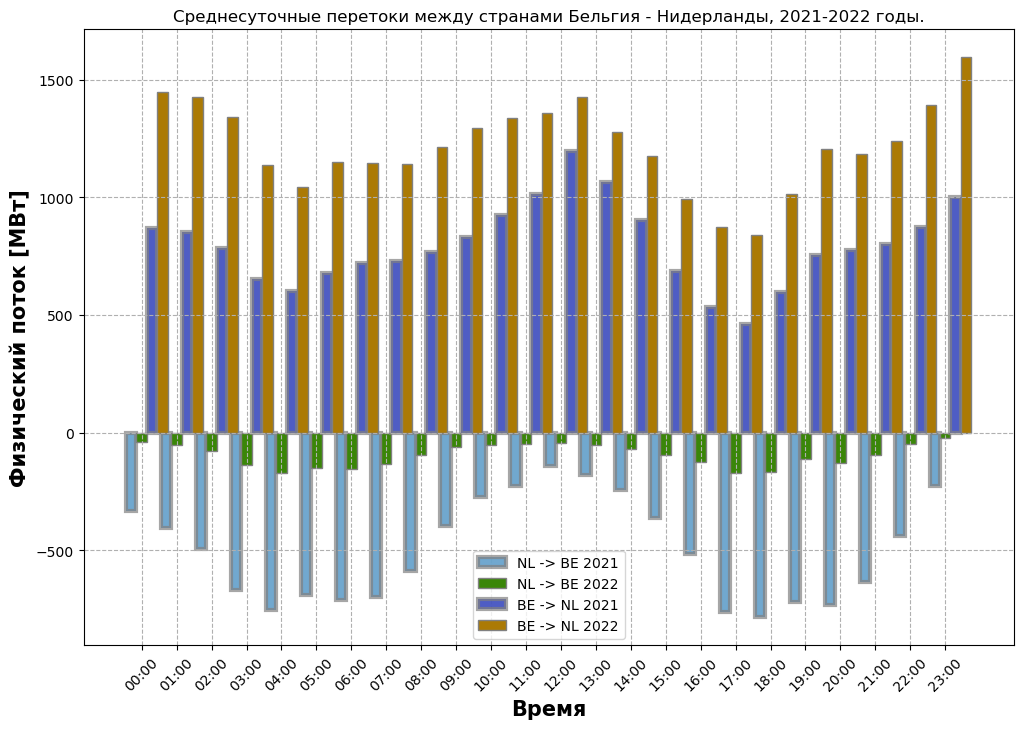

In [16]:
# Бельгия Нидерланды 2021-2022 год
 
# ширина столбца и размер графика 
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))

# формирование входных данные
nl_be_2021_plot = be_nl_2021_grouped['nl_be_2021'] 
nl_be_2022_plot = be_nl_2021_grouped['nl_be_2022'] 
be_nl_2021_plot = be_nl_2021_grouped['be_nl_2021']
be_nl_2022_plot = be_nl_2021_grouped['be_nl_2022']
 
# задание позиции столбцов графика по оси Х (задание смещения) 
br1 = np.arange(len(be_nl_2021_grouped['time'])) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# построение графика 
plt.bar(br1, fr_be_2021_plot, color ='#3584BB', width = barWidth, 
        linewidth=3, alpha=0.7, edgecolor ='grey', label ='NL -> BE 2021') 
plt.bar(br2, fr_be_2022_plot, color ='#3A8608', width = barWidth, 
        edgecolor ='grey', label ='NL -> BE 2022') 

plt.bar(br3, be_fr_2021_plot, color ='#0519AB', width = barWidth, 
        linewidth=3, alpha=0.7, edgecolor ='grey', label ='BE -> NL 2021')
plt.bar(br4, be_fr_2022_plot, color ='#AB7A05', width = barWidth, 
        edgecolor ='grey', label ='BE -> NL 2022')


# добавление подписей
plt.title('Среднесуточные перетоки между странами Бельгия - Нидерланды, 2021-2022 годы.')
plt.xlabel('Время', fontweight ='bold', fontsize = 15) 
plt.ylabel('Физический поток [МВт]', fontweight ='bold', fontsize = 15)

plt.xticks([r + barWidth for r in np.arange(len(be_nl_2021_grouped['time']))], 
        ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'])

# поворот надписей
plt.xticks(rotation = 45)

# сохранение
plt.savefig('be_nl_2021_22_plot.png', bbox_inches='tight')

# сетка и ее стиль
plt.grid(linestyle='--')
plt.legend()
plt.show();

In [17]:
# для вывода на графике переносим все данные в один DF fr nl
# задаем положительные значения для перетока Франция -> Бельгия, Нидерланды -> Бельгия

be_fr_nl = be_fr_2021.copy()

be_fr_nl[['nl_be_2021', 'be_nl_2021', 'nl_be_2022', 'be_nl_2022']] = be_nl_2021[['nl_be_2021', 'be_nl_2021', 'nl_be_2022', 'be_nl_2022']]

be_fr_nl.head(2)

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,00:00,-0.0,477.0,-0.0,2618.0,-1691.0,0.0,-0.0,620.0
1,01:00,-0.0,645.0,-0.0,2361.0,-1418.0,0.0,-0.0,728.0


In [18]:
head_list = ['fr_be_2021',  'be_fr_2021',  'fr_be_2022',  'be_fr_2022',  'nl_be_2021',  'be_nl_2021',  'nl_be_2022',  'be_nl_2022']
for index in head_list:
    be_fr_nl[index] = abs(be_fr_nl[index])

In [19]:
be_fr_nl.head(2)

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,00:00,0.0,477.0,0.0,2618.0,1691.0,0.0,0.0,620.0
1,01:00,0.0,645.0,0.0,2361.0,1418.0,0.0,0.0,728.0


In [20]:
# создадим словарь для замены всех значений времени, . один любой символ
# '01.01.2021 00:00 - 01.01.2021 01:00' -> '00:00'
time_list_for_all_time = {
    '..:..': 'all_time',
}

In [21]:
def replace_wrong_time_all_means(df_name):
    for wrong_value in time_list_for_all_time:
        df_name['time'] = df_name['time'].replace(wrong_value, time_list_for_all_time.get(wrong_value), regex=True)


In [22]:
# обращаемся к функции
replace_wrong_time_all_means(be_fr_nl)

In [23]:
be_fr_nl.head(2)

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,all_time,0.0,477.0,0.0,2618.0,1691.0,0.0,0.0,620.0
1,all_time,0.0,645.0,0.0,2361.0,1418.0,0.0,0.0,728.0


In [24]:
be_fr_nl_grouped = (be_fr_nl.groupby(['time'])
                          .sum()
                          .round(0)
                          .reset_index()
                          .sort_values('time', ascending = True))

In [25]:
be_fr_nl_grouped

,time,fr_be_2021,be_fr_2021,fr_be_2022,be_fr_2022,nl_be_2021,be_nl_2021,nl_be_2022,be_nl_2022
0,all_time,4371479.0,6966632.0,837543.0,10682423.0,5292187.0,3207831.0,2590503.0,6220498.0


In [26]:
# поменяем очередность столбцов
be_fr_nl_grouped = be_fr_nl_grouped[['time', 'be_fr_2021', 'fr_be_2021', 'be_nl_2021', 'nl_be_2021', 'fr_be_2022', 'be_fr_2022', 'be_nl_2022', 'nl_be_2022']]

In [27]:
# получим список по новым данным
be_fr_nl_grouped_row = be_fr_nl_grouped.loc[0].tolist()
print(be_fr_nl_grouped_row[0:8])

['all_time', 6966632.0, 4371479.0, 3207831.0, 5292187.0, 837543.0, 10682423.0, 6220498.0]


In [28]:
# создадим три новых списка для формирования новой таблицы
country = ['FR > BE', 'BE > FR', 'NL > BE', 'BE > NL']
columns_2021 = be_fr_nl_grouped_row[1:4]
columns_2022 = be_fr_nl_grouped_row[5:8]

d_list = [country, columns_2021, columns_2022]
f_list = list(map(list, zip(*d_list)))

print(f_list)

# создадим новый дадат фрэйм
be_fr_nl_sum_for_plot = pd.DataFrame(f_list, columns=['Страны', '2021 [ГВт]', '2022 [ГВт]']) 
print(be_fr_nl_sum_for_plot)

[['FR > BE', 6966632.0, 837543.0], ['BE > FR', 4371479.0, 10682423.0], ['NL > BE', 3207831.0, 6220498.0]]
    Страны  2021 [ГВт]  2022 [ГВт]
0  FR > BE   6966632.0    837543.0
1  BE > FR   4371479.0  10682423.0
2  NL > BE   3207831.0   6220498.0


In [29]:
be_fr_nl_sum_for_plot[['2021 [ГВт]', '2022 [ГВт]']] = ((be_fr_nl_sum_for_plot[['2021 [ГВт]', '2022 [ГВт]']])/1000).round(0)

In [30]:
print(be_fr_nl_sum_for_plot)

    Страны  2021 [ГВт]  2022 [ГВт]
0  FR > BE      6967.0       838.0
1  BE > FR      4371.0     10682.0
2  NL > BE      3208.0      6220.0


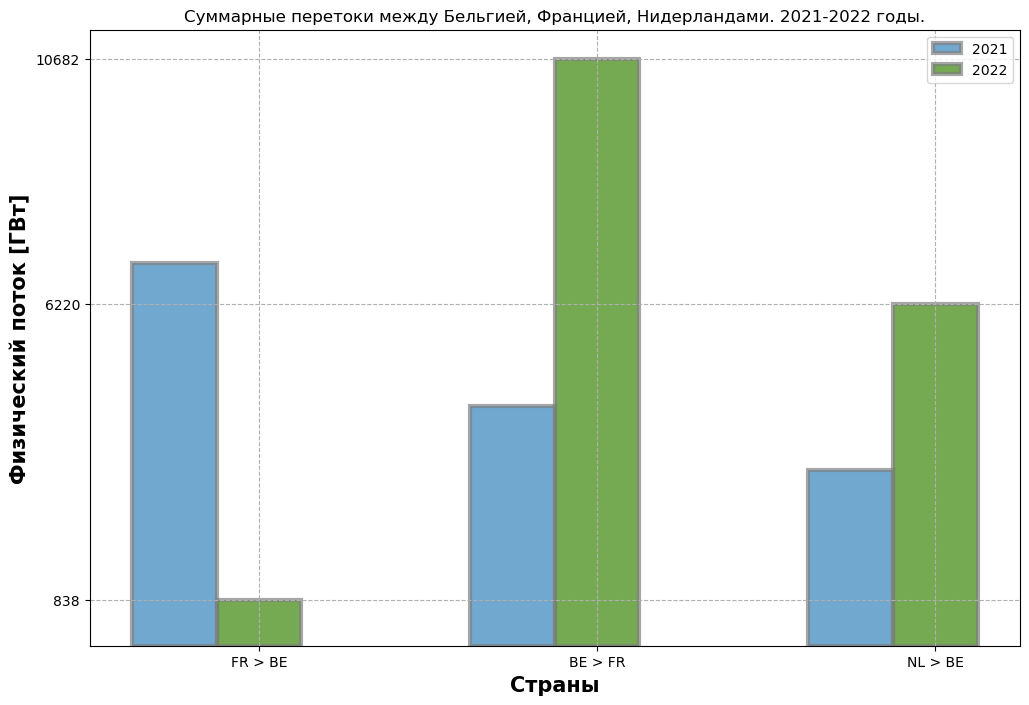

In [31]:
# ширина столбцов 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# значения столбцов (высота) 
IT = be_fr_nl_sum_for_plot['2021 [ГВт]'] 
ECE = be_fr_nl_sum_for_plot['2022 [ГВт]'] 
 
# позиция столбцов на оси Х 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1] 

# построение графика
plt.bar(br1, IT, color ='#3584BB', width = barWidth, 
        edgecolor ='grey', linewidth=3, alpha=0.7, label ='2021') 
plt.bar(br2, ECE, color ='#3A8608', width = barWidth, 
        edgecolor ='grey', linewidth=3, alpha=0.7, label ='2022') 

 
# подписи 
plt.title('Суммарные перетоки между Бельгией, Францией, Нидерландами. 2021-2022 годы.')
plt.xlabel('Страны', fontweight ='bold', fontsize = 15) 
plt.ylabel('Физический поток [ГВт]', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], be_fr_nl_sum_for_plot['Страны'])
plt.yticks(be_fr_nl_sum_for_plot['2022 [ГВт]'])
#plt.yticks(be_fr_nl_sum_for_plot[['2021 [ГВт]', '2022 [ГВт]']])
#plt.xticks([r + barWidth for r in range(len(IT))], 
#        ['FR > BE', 'BE > FR', '2017', '2018'])

# сетка и ее стиль
plt.grid(linestyle='--')
plt.legend()
plt.show()

Выводы:
- Наблюдаются пики в 12:00, 18:00, 23:00 часов в среднесуточном перетоке энергии в 2021 и 2022 году для Бельгии, Франции, Нидерландов.
- Общая картина среднесуточных значений изменилась, как для Франции, так и для Нидерландов: среднесуточный переток в эти страны увеличился в 2022 году.
- Максимальный суммарный переток наблюдался в 2022 году, между Бельгией и Францией.